### Challenger USA Space Shittle O-ring Erosion
##### - source data:  https://www.kaggle.com/nachiket10/challenger-oring-erosion

##### - Backgroud
##### On January 28th, 1986, the spacecraft known as the challenger broke apart after 73 seconds into flight. Not only destroying millions of dollars worth of equipment but as well as taking the lives of 7 astronauts. 
##### After much investigation and speculation, it was concluded that this disaster was due to the fact that the right rocket solid booster failed to lift off because the O-ring seal was damaged. It was discovered that O-ring seals were not designed to function well in very cold temperatures (which were seen in this flight) and therefore did not perform and therefore, pressurized gas made it’s way to the external part of the ship and lead to its demise. 
##### During the investigation, data from different spacecrafts was taken in order to test O-ring design under different temperatures (F) and leak pressures (PSI). Below, you can observe the libraries that i will be using in this analysis, as well as head of the data that will be used. 
##### For this model, the dependent variable will be the Rings under distress as that is what we want to check for degradation and our predictors will be temperature and leak check pressure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')

from scipy import stats 
import scipy.stats as stats
import statsmodels.formula.api as sm 
from statsmodels.formula.api import ols
import pylab

#### 1. Data loading and naming headers 

In [2]:
oring_df = pd.read_csv('data/o-ring-erosion-or-blowby.csv', header = None) 

print(oring_df.shape)
oring_df.head()

(23, 5)


,0,1,2,3,4
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


###### Number of Attributes: 5 (Attribute Information: all values are positive integers) 
######     1. Number of O-rings at risk on a given flight
######     2. Number experiencing thermal distress
######     3. Launch temperature (degrees F)
######     4. Leak-check pressure (psi)
######     5. Temporal order of flight

In [3]:
oring_df.rename(columns = {0: 'Rings_at_risk', 
                           1: 'Rings_under_distress', 
                           2: 'Temp', 
                           3: 'Leak_check_pressure', 
                           4: 'Flight_Order'}, inplace = True)
oring_df.head()

,Rings_at_risk,Rings_under_distress,Temp,Leak_check_pressure,Flight_Order
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5


#### 2. Predictive model
##### - Regression(OLS) model to observe the O-ring degradation at diffent temp  

In [8]:
oring_df.describe()

,Rings_at_risk,Rings_under_distress,Temp,Leak_check_pressure,Flight_Order
count,23.0,23.000000,23.000000,23.000000,23.00000
mean,6.0,0.391304,69.565217,152.173913,12.00000
std,0.0,0.656376,7.057080,68.221332,6.78233
min,6.0,0.000000,53.000000,50.000000,1.00000
25%,6.0,0.000000,67.000000,75.000000,6.50000
50%,6.0,0.000000,70.000000,200.000000,12.00000
75%,6.0,1.000000,75.000000,200.000000,17.50000
max,6.0,2.000000,81.000000,200.000000,23.00000


In [5]:
model = ols('Rings_under_distress ~  Temp + Leak_check_pressure', data = oring_df).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Rings_under_distress   R-squared:                       0.354
Model:                              OLS   Adj. R-squared:                  0.290
Method:                   Least Squares   F-statistic:                     5.490
Date:                  Mon, 27 Jul 2020   Prob (F-statistic):             0.0126
Time:                          13:36:47   Log-Likelihood:                -17.408
No. Observations:                    23   AIC:                             40.82
Df Residuals:                        20   BIC:                             44.22
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept     

##### <font color = 'yellow'> --> model : RingsErosion = 3.3298 - 0.0487(Temp) + 0.0029(Leak_check_pressure) </font>

#### 3. Model Applying 
##### - How many rings will show erosion at Temp 31F? 

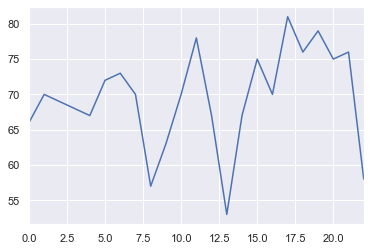

In [13]:
oring_df['Temp'].plot().sort

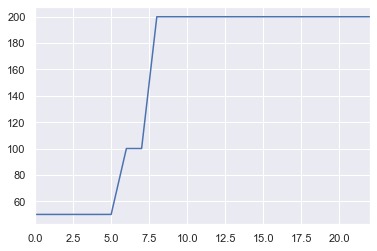

In [14]:
oring_df['Leak_check_pressure'].plot()

In [15]:
temp = 31
pressure = 50

RingsErosion = 3.3298 - (0.0487*temp) + (0.0029*pressure)
print(RingsErosion)

1.9651


In [16]:
temp = 31
pressure = 100

RingsErosion = 3.3298 - (0.0487*temp) + (0.0029*pressure)
print(RingsErosion)

2.1101


In [17]:
temp = 31
pressure = 200

RingsErosion = 3.3298 - (0.0487*temp) + (0.0029*pressure)
print(RingsErosion)

2.4001


##### - 온도가 31F이고, 압력이 50~200 PSI인 경우에서 
##### - 압력이 높아질수록 ring의 부식이 발생할 확률이 높아지며, 대략 2개 정도가 부식현상을 보일 것으로 예상됨 